In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")


In [33]:
#load dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
data.info()
data.describe()


<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
#select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [36]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


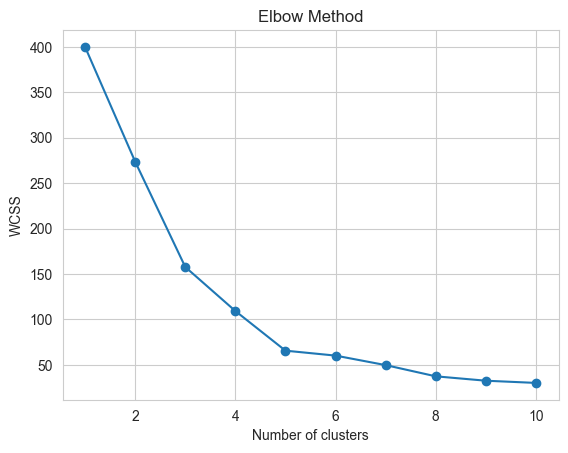

In [37]:
#elbow method (find best clusters)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [38]:
#train K-means model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_
data['Cluster'] = clusters
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


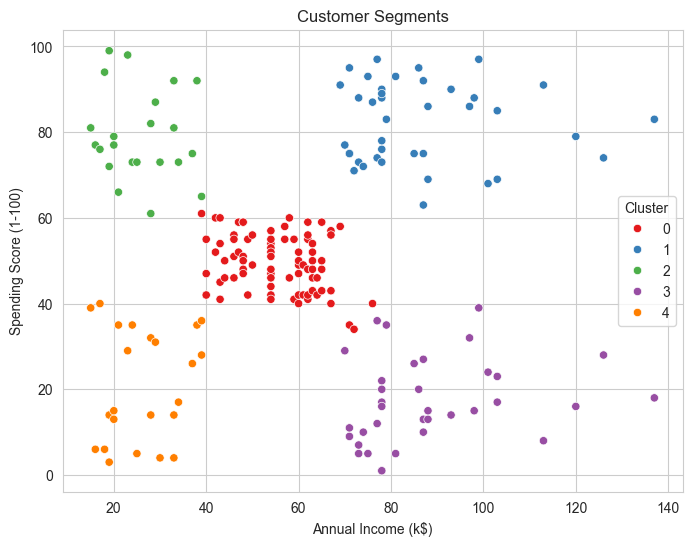

In [39]:
#visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'],
                hue=data['Cluster'],
                palette='Set1')

plt.title("Customer Segments")
plt.show()


In [40]:
#save model and scaler
pickle.dump(kmeans, open("model/kmeans_model.pkl", "wb"))
pickle.dump(scaler, open("model/scaler.pkl", "wb"))


In [41]:
#example-test the model
# Example customer
sample = np.array([[50, 60]])  # Income, Spending Score
sample_scaled = scaler.transform(sample)

pred_cluster = kmeans.predict(sample_scaled)
print("Customer belongs to cluster:", pred_cluster[0])


Customer belongs to cluster: 0


In [42]:
data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [43]:
segment_meaning = {
    0: "Average Customer - Moderate income & moderate spending",
    1: "Premium Customer - High income & high spending",
    2: "Impulsive Buyer - Low income but high spending",
    3: "Careful Customer - High income but low spending",
    4: "Budget Customer - Low income & low spending"
}
